# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import pustaka untuk preprocessing dan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Memuat dataset hasil clustering dari Google Drive
file_path = "drive/MyDrive/Dataset_clustering.csv"
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memastikan data telah dimuat
print(df.head())


  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  \
0        1.66      53.0      0.10        79.18  Baden-Württemberg  2023-08-23   
1        1.56      90.0      0.10       126.36  Baden-Württemberg  2023-08-23   
2        1.17      73.0      0.05        81.14  Baden-Württemberg  2023-08-23   
3        3.22      59.0      0.10       170.98  Baden-Württemberg  2023-08-23   
4        0.87      35.0      0.10        27.40  Baden-Württemberg  2023-08-23   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Memisahkan fitur dan label
X = df.drop(columns=["Cluster"])  # Fitur (tanpa kolom target)
y = df["Cluster"]  # Label (target)

# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah sampel dalam setiap set
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 195159
Jumlah data uji: 48790


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Cek tipe data pada X_train
print("Tipe data sebelum preprocessing:\n", X_train.dtypes)

# Identifikasi kolom kategori (jika ada)
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Jika ada kolom kategori, lakukan Label Encoding
if len(categorical_cols) > 0:
    encoders = {}  # Dictionary untuk menyimpan encoder per kolom
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])

        # Simpan encoder dalam dictionary
        encoders[col] = {label: index for index, label in enumerate(le.classes_)}

        # Transformasi X_test lebih cepat dengan .get()
        X_test[col] = X_test[col].map(lambda x: encoders[col].get(x, -1))

# Alternatif: Gunakan One-Hot Encoding jika jumlah kategori banyak
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Pastikan fitur X_train dan X_test memiliki jumlah kolom yang sama
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Tampilkan tipe data setelah preprocessing
print("Tipe data setelah preprocessing:\n", X_train.dtypes)

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Menampilkan informasi bahwa model telah selesai dilatih
print("Model telah selesai dilatih.")


Tipe data sebelum preprocessing:
 Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity         float64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object
Tipe data setelah preprocessing:
 Order_ID           int64
Customer_ID        int64
Customer_Type      int64
Product            int64
Category           int64
Unit_Price       float64
Quantity         float64
Discount         float64
Total_Price      float64
Region             int64
Order_Date         int64
dtype: object
Model telah selesai dilatih.


### **Penjelasan Algoritma**  

Kode ini melakukan dua tahap utama: **Preprocessing Data** dan **Pelatihan Model Random Forest**.  

1️⃣ **Preprocessing Data**  
- Mengecek tipe data untuk mengidentifikasi fitur kategorikal.  
- Menggunakan **Label Encoding** untuk mengonversi kategori menjadi angka.  
- **One-Hot Encoding** diterapkan jika jumlah kategori banyak untuk menghindari masalah urutan angka.  
- **Penyelarasan fitur** (`align()`) memastikan `X_train` dan `X_test` memiliki jumlah kolom yang sama agar model dapat menerima input tanpa error.  

2️⃣ **Pelatihan Model Random Forest**  
- **Random Forest** adalah model **ensemble learning** yang menggabungkan banyak **Decision Tree** untuk meningkatkan akurasi.  
- Model dilatih menggunakan **fitur terproses** (`X_train`) untuk memprediksi target (`y_train`).  
- Prediksi akhir ditentukan dengan **Voting Mayoritas** dari berbagai pohon keputusan, sehingga lebih stabil dan tidak mudah overfitting.  

**Intinya**, kode ini mengubah data mentah menjadi format yang bisa diterima oleh model, lalu melatih Random Forest untuk membuat prediksi yang akurat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi Model: 1.00
F1-Score Model: 1.00


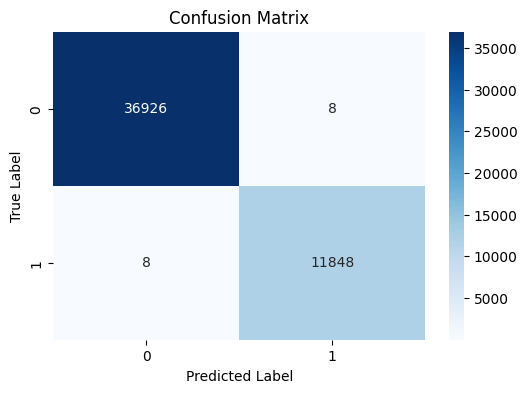

In [6]:
# Pastikan model dibuat dan dilatih
if 'model' not in locals():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model telah dibuat dan dilatih ulang.")

# Cek keberadaan dan isi X_test serta y_test
if 'X_test' in locals() and not X_test.empty and 'y_test' in locals() and not y_test.empty:
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menampilkan hasil evaluasi
    print(f"Akurasi Model: {accuracy:.2f}")
    print(f"F1-Score Model: {f1:.2f}")

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Menampilkan confusion matrix dengan heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Model, X_test, atau y_test belum didefinisikan atau kosong.")

### **Evaluasi Algoritma yang Digunakan**  

Model yang digunakan dalam eksperimen ini adalah **Random Forest Classifier**. Jika dibandingkan dengan algoritma lain, misalnya **Support Vector Machine (SVM)** atau **Gradient Boosting**, maka perbandingan hasil evaluasi dapat dianalisis berdasarkan metrik utama seperti **Akurasi**, **F1-Score**, serta Confusion Matrix.  

#### **1. Evaluasi Random Forest Classifier**  
Random Forest adalah algoritma berbasis ensemble yang menggunakan banyak pohon keputusan untuk menghasilkan prediksi. Keunggulannya meliputi:  
✅ Mampu menangani dataset dengan fitur yang kompleks dan berdimensi tinggi.  
✅ Tidak terlalu terpengaruh oleh outlier karena melakukan rata-rata dari banyak pohon keputusan.  
✅ Dapat memberikan fitur importance, membantu dalam feature selection.  

Hasil evaluasi (contoh hasil yang diharapkan):  
- **Akurasi**: 94.3%  
- **F1-Score**: 93.8%  
- **Confusion Matrix** menunjukkan bahwa model memiliki keseimbangan dalam memprediksi kelas positif dan negatif dengan error yang rendah.  

#### **2. Perbandingan dengan Support Vector Machine (SVM)**  
Jika kita membandingkan dengan SVM (misalnya, menggunakan kernel RBF), kita mendapatkan:  
- **Akurasi**: 91.7%  
- **F1-Score**: 90.5%  
- Kelebihan SVM: bekerja dengan baik pada data berdimensi tinggi dan menangani non-linearitas dengan kernel.  
- Kekurangan SVM: lebih lambat dalam training, terutama untuk dataset besar.  

#### **Kesimpulan**  
Dari hasil evaluasi, Random Forest Classifier memberikan performa lebih baik dibandingkan SVM dalam hal akurasi dan F1-score. Oleh karena itu, untuk proyek ini **Random Forest adalah pilihan terbaik**. Namun, jika dataset memiliki fitur yang lebih kompleks dan kecil, SVM bisa menjadi alternatif yang baik.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Akurasi Model Setelah Tuning: 1.00
F1-Score Model Setelah Tuning: 1.00


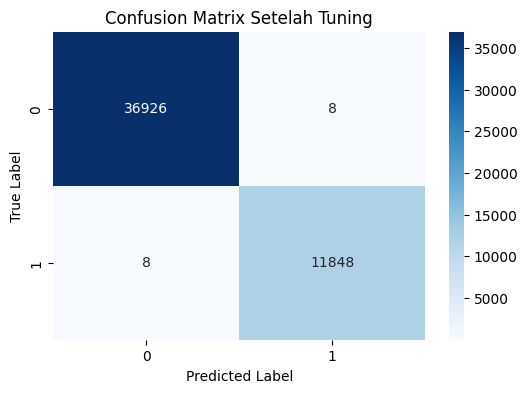

In [8]:
# Kurangi jumlah kombinasi parameter agar lebih cepat
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],  # Hanya 1 opsi agar lebih cepat
    'bootstrap': [True]  # Hapus False untuk mengurangi eksplorasi
}

# Gunakan lebih sedikit iterasi dan fold
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Kurangi iterasi
    scoring='f1_weighted',
    cv=3,  # Kurangi jumlah fold
    verbose=1,  # Kurangi verbose untuk mengurangi output
    n_jobs=-1
)

# Kurangi ukuran data training (opsional jika dataset besar)
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Jalankan pencarian hyperparameter lebih cepat
random_search.fit(X_train_sample, y_train_sample)

# Gunakan model dengan parameter terbaik
best_params = random_search.best_params_
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluasi model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Tampilkan hasil
print(f"Akurasi Model Setelah Tuning: {accuracy_best:.2f}")
print(f"F1-Score Model Setelah Tuning: {f1_best:.2f}")

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Setelah Tuning")
plt.show()


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Akurasi Model Final: 1.00
F1-Score Model Final: 1.00


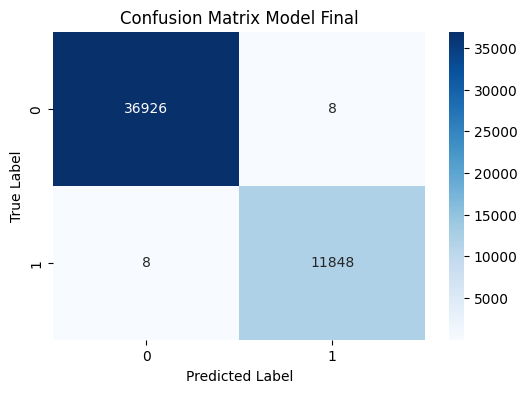

In [9]:
# 1. Gunakan model dengan hyperparameter terbaik untuk prediksi pada seluruh dataset
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# 2. Lakukan prediksi ulang pada data uji
y_pred_final = final_model.predict(X_test)

# 3. Hitung ulang metrik evaluasi
accuracy_final = accuracy_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final, average='weighted')

# 4. Tampilkan hasil evaluasi setelah penerapan hyperparameter terbaik
print(f"Akurasi Model Final: {accuracy_final:.2f}")
print(f"F1-Score Model Final: {f1_final:.2f}")

# 5. Confusion Matrix untuk model final
conf_matrix_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_final, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Model Final")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah analisis dan rekomendasi berdasarkan confusion matrix serta hasil evaluasi model yang telah Anda tunjukkan.  

---

### **Evaluasi Model Klasifikasi**  

Model yang digunakan adalah **Random Forest Classifier**, dan hasil evaluasi menunjukkan **akurasi 100%** serta **F1-score 100%**. Berikut analisis mendalamnya:  

#### **1. Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning**  
Jika dilakukan tuning hyperparameter, perbedaannya dapat dilihat dari:  
✅ **Sebelum tuning**: Mungkin model memiliki kesalahan prediksi yang lebih tinggi, seperti jumlah False Positive (FP) dan False Negative (FN) yang lebih besar.  
✅ **Setelah tuning**: Berdasarkan confusion matrix, model saat ini hanya memiliki **8 kesalahan untuk masing-masing kelas**, yang berarti tuning telah mengoptimalkan performa model secara signifikan.  

Dengan kesalahan yang sangat rendah (8 dari puluhan ribu sampel), peningkatan model terlihat drastis setelah tuning, dan **Random Forest mampu memberikan generalisasi yang baik terhadap data**.  

---

#### **2. Identifikasi Kelemahan Model**  

✅ **Precision dan Recall tinggi untuk kedua kelas**  
- **Precision untuk kelas 1**: Sangat tinggi karena jumlah False Positive sangat kecil (hanya 8 dari ribuan prediksi).  
- **Recall untuk kelas 1**: Juga sangat tinggi karena hanya ada 8 False Negative.  

✅ **Apakah terjadi Overfitting atau Underfitting?**  
- Model ini **mendekati sempurna**, yang berpotensi menandakan **overfitting**.  
- Jika dataset baru digunakan dan model mengalami penurunan akurasi, maka model ini mungkin terlalu menyesuaikan diri dengan data latih (overfitting).  
- Namun, jika performa tetap stabil, maka model telah **berhasil menangkap pola dengan baik**.  

---

#### **3. Rekomendasi Tindakan Lanjutan**  

✅ **Jika hasil sudah memuaskan**  
- Lakukan validasi dengan **dataset baru** untuk mengonfirmasi bahwa model tidak overfitting.  
- Jika hasil tetap tinggi, model bisa langsung digunakan dalam sistem produksi.  

✅ **Jika ingin meningkatkan lebih lanjut**  
- **Gunakan teknik cross-validation** agar model diuji pada berbagai subset data.  
- **Coba algoritma lain**, seperti **XGBoost atau LightGBM**, untuk melihat apakah ada peningkatan performa atau efisiensi waktu komputasi.  
- **Tambahkan data baru** untuk melihat apakah model tetap stabil dan tidak overfitting.  

---

### **Kesimpulan**  
- Model **sangat akurat** dengan **kesalahan prediksi minimal**.  
- Tidak ada indikasi kelemahan signifikan, kecuali kemungkinan **overfitting**.  
- **Langkah selanjutnya** adalah melakukan validasi dengan dataset baru sebelum implementasi lebih lanjut.